In [1]:
#First I imported all the necessary libraries that will be needed to complete my project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import geopandas as gpd


In [2]:
#Importing my dataset
df = pd.read_csv('world_population.csv')
#Use head, tail, and info to show the basic information about the dataset
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [3]:
df.tail()


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [5]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [6]:
#after this we do some cleaning and preparation for our dataset 

In [7]:
#first I created dummy variables for continents
continents = df['Continent'].explode().unique()
for Continent in continents:
    df[Continent] = df['Continent'].apply(lambda x: 1 if Continent in x else 0)
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,...,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Asia,Europe,Africa,Oceania,North America,South America
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,...,652230,63.0587,1.0257,0.52,1,0,0,0,0,0
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,...,28748,98.8702,0.9957,0.04,0,1,0,0,0,0
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,...,2381741,18.8531,1.0164,0.56,0,0,1,0,0,0
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,...,199,222.4774,0.9831,0.00,0,0,0,1,0,0
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,...,468,170.5641,1.0100,0.00,0,1,0,0,0,0


In [8]:
# Then I created a binary target variable: you can change the date to 2022,1970 etc
threshold = 10000000  # counts as 1 if the population is over (10 million) otherwise 0
df['High Population'] = (df['2000 Population'] > threshold).astype(int)
df.head()


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,...,Density (per km²),Growth Rate,World Population Percentage,Asia,Europe,Africa,Oceania,North America,South America,High Population
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,...,63.0587,1.0257,0.52,1,0,0,0,0,0,1
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,...,98.8702,0.9957,0.04,0,1,0,0,0,0,0
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,...,18.8531,1.0164,0.56,0,0,1,0,0,0,1
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,...,222.4774,0.9831,0.00,0,0,0,1,0,0,0
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,...,170.5641,1.0100,0.00,0,1,0,0,0,0,0


In [9]:
#Label encoding for country/territory 
le=LabelEncoder()
df['Country/Territory'] = le.fit_transform(df['Country/Territory'])
df.head(10)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,...,Density (per km²),Growth Rate,World Population Percentage,Asia,Europe,Africa,Oceania,North America,South America,High Population
0,36,AFG,0,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,...,63.0587,1.0257,0.52,1,0,0,0,0,0,1
1,138,ALB,1,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,...,98.8702,0.9957,0.04,0,1,0,0,0,0,0
2,34,DZA,2,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,...,18.8531,1.0164,0.56,0,0,1,0,0,0,1
3,213,ASM,3,Pago Pago,Oceania,44273,46189,51368,54849,58230,...,222.4774,0.9831,0.00,0,0,0,1,0,0,0
4,203,AND,4,Andorra la Vella,Europe,79824,77700,71746,71519,66097,...,170.5641,1.0100,0.00,0,1,0,0,0,0,0
5,42,AGO,5,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,...,28.5466,1.0315,0.45,0,0,1,0,0,0,1
6,224,AIA,6,The Valley,North America,15857,15585,14525,13172,11047,...,174.2527,1.0066,0.00,0,0,0,0,1,0,0
7,201,ATG,7,Saint John’s,North America,93763,92664,89941,85695,75055,...,212.1335,1.0058,0.00,0,0,0,0,1,0,0
8,33,ARG,8,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,...,16.3683,1.0052,0.57,0,0,0,0,0,1,1
9,140,ARM,9,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,...,93.4831,0.9962,0.03,1,0,0,0,0,0,0


In [10]:
#After cleaning and preparation our data is ready to create some visualization (EDA)


In [11]:
#creating correlation matrix to see how they correlated to each other 
df.corr(numeric_only=True)

,Rank,Country/Territory,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,...,Density (per km²),Growth Rate,World Population Percentage,Asia,Europe,Africa,Oceania,North America,South America,High Population
Rank,1.000000,-0.042460,-0.358361,-0.355854,-0.351222,-0.347461,-0.341057,-0.336152,-0.335246,-0.335379,...,0.129436,-0.224561,-0.358464,-0.308221,0.054020,-0.212898,0.347130,0.291909,-0.074423,-0.797153
Country/Territory,-0.042460,1.000000,-0.044589,-0.044706,-0.044745,-0.044699,-0.045543,-0.045633,-0.044613,-0.043454,...,0.013591,0.045103,-0.044670,0.089673,-0.039820,0.004790,0.100410,-0.098311,-0.064820,0.026457
2022 Population,-0.358361,-0.044589,1.000000,0.999946,0.999490,0.998629,0.994605,0.987228,0.980285,0.973162,...,-0.027618,-0.020863,0.999999,0.230530,-0.073382,-0.037607,-0.077696,-0.063440,-0.005311,0.319743
2020 Population,-0.355854,-0.044706,0.999946,1.000000,0.999763,0.999105,0.995583,0.988724,0.982121,0.975254,...,-0.027358,-0.025116,0.999944,0.230247,-0.071606,-0.040389,-0.077088,-0.062575,-0.004992,0.317454
2015 Population,-0.351222,-0.044745,0.999490,0.999763,1.000000,0.999783,0.997340,0.991594,0.985724,0.979414,...,-0.026857,-0.032154,0.999487,0.230085,-0.067699,-0.046480,-0.076049,-0.060963,-0.004304,0.313280
2010 Population,-0.347461,-0.044699,0.998629,0.999105,0.999783,1.000000,0.998593,0.993929,0.988786,0.983042,...,-0.026505,-0.037983,0.998626,0.229435,-0.063642,-0.051882,-0.075198,-0.059628,-0.003599,0.310209
2000 Population,-0.341057,-0.045543,0.994605,0.995583,0.997340,0.998593,1.000000,0.998336,0.995160,0.990956,...,-0.026139,-0.050515,0.994598,0.226514,-0.054943,-0.060597,-0.073793,-0.057515,-0.002932,0.305082
1990 Population,-0.336152,-0.045633,0.987228,0.988724,0.991594,0.993929,0.998336,1.000000,0.999042,0.996602,...,-0.026224,-0.062397,0.987218,0.221607,-0.044341,-0.066934,-0.072873,-0.056647,-0.003839,0.301074
1980 Population,-0.335246,-0.044613,0.980285,0.982121,0.985724,0.988786,0.995160,0.999042,1.000000,0.999194,...,-0.026587,-0.072349,0.980273,0.215400,-0.032794,-0.073267,-0.072772,-0.054400,-0.005298,0.300852
1970 Population,-0.335379,-0.043454,0.973162,0.975254,0.979414,0.983042,0.990956,0.996602,0.999194,1.000000,...,-0.026881,-0.081313,0.973150,0.208909,-0.020562,-0.078647,-0.072913,-0.053033,-0.007476,0.301630


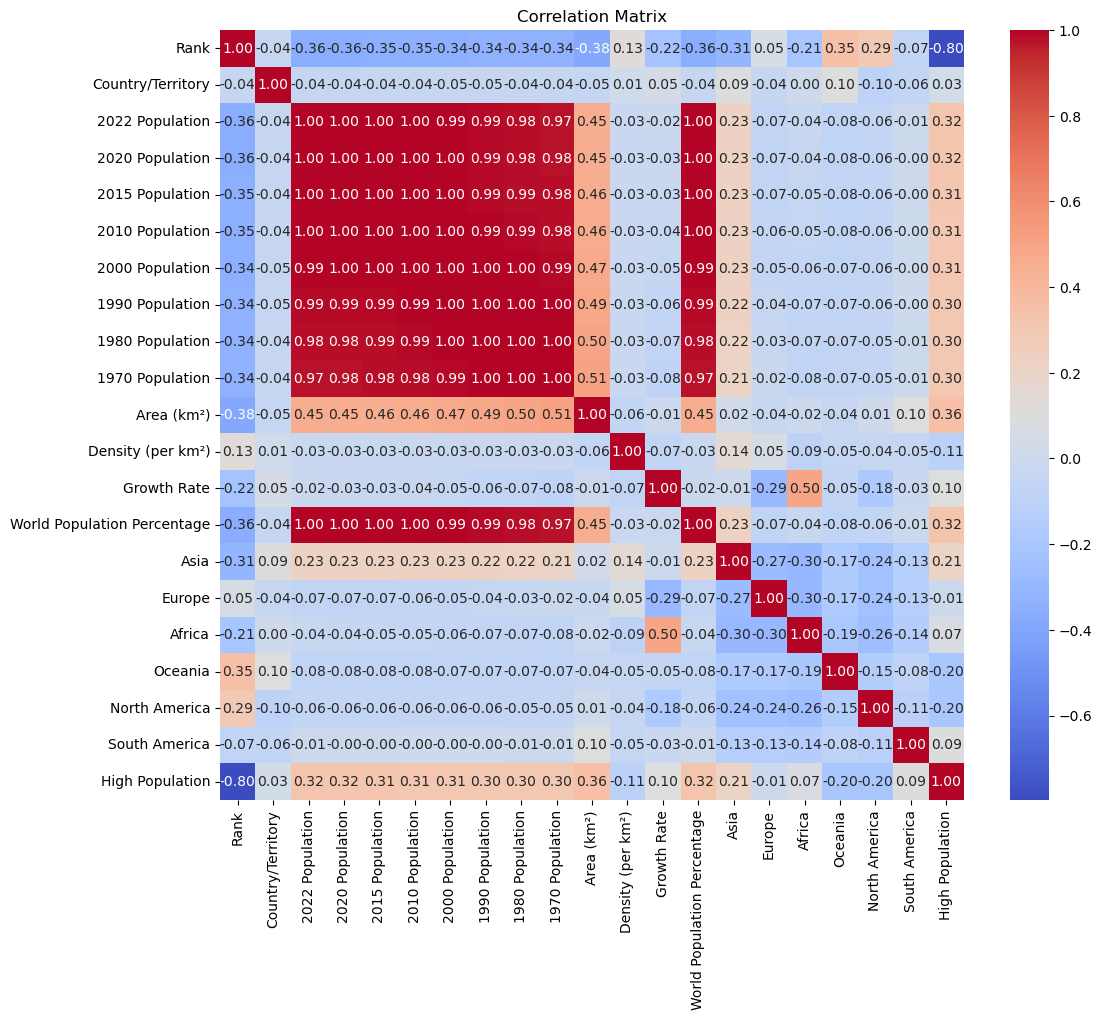

In [12]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
df.sort_values(by="World Population Percentage", ascending=False).head(10)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,...,Density (per km²),Growth Rate,World Population Percentage,Asia,Europe,Africa,Oceania,North America,South America,High Population
41,1,CHN,41,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,...,146.8933,1.0000,17.88,1,0,0,0,0,0,1
92,2,IND,92,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,...,431.0675,1.0068,17.77,1,0,0,0,0,0,1
221,3,USA,221,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,...,36.0935,1.0038,4.24,0,0,0,0,1,0,1
93,4,IDN,93,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,...,144.6529,1.0064,3.45,1,0,0,0,0,0,1
156,5,PAK,156,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,...,267.4018,1.0191,2.96,1,0,0,0,0,0,1
149,6,NGA,149,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,...,236.5759,1.0241,2.74,0,0,1,0,0,0,1
27,7,BRA,27,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,...,25.2841,1.0046,2.70,0,0,0,0,0,1,1
16,8,BGD,16,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,...,1160.0350,1.0108,2.15,1,0,0,0,0,0,1
171,9,RUS,171,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,...,8.4636,0.9973,1.81,0,1,0,0,0,0,1
131,10,MEX,131,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,...,64.9082,1.0063,1.60,0,0,0,0,1,0,1


In [14]:
df.groupby('Continent').mean(numeric_only= True).sort_values(by="2010 Population",ascending=False)

,Rank,Country/Territory,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,...,Density (per km²),Growth Rate,World Population Percentage,Asia,Europe,Africa,Oceania,North America,South America,High Population
Continent,,,,,,,,,,,,,,,,,,,,,
Asia,77.560000,128.120000,9.442767e+07,9.326173e+07,8.916500e+07,8.440083e+07,7.470179e+07,6.421127e+07,5.270668e+07,4.289813e+07,...,1025.024136,1.009384,1.183800,1.0,0.0,0.0,0.0,0.0,0.0,0.520000
South America,97.571429,99.142857,3.120119e+07,3.082357e+07,2.950960e+07,2.807702e+07,2.497388e+07,2.122474e+07,1.727064e+07,1.378194e+07,...,20.971979,1.007957,0.391429,0.0,0.0,0.0,0.0,0.0,1.0,0.500000
Africa,92.157895,117.070175,2.503037e+07,2.387144e+07,2.107197e+07,1.851277e+07,1.436747e+07,1.119563e+07,8.448007e+06,6.411304e+06,...,125.047646,1.021244,0.313509,0.0,0.0,1.0,0.0,0.0,0.0,0.385965
Europe,124.500000,111.340000,1.486295e+07,1.491584e+07,1.483071e+07,1.471228e+07,1.452187e+07,1.440642e+07,1.385054e+07,1.311848e+07,...,663.324742,1.002256,0.186600,0.0,1.0,0.0,0.0,0.0,0.0,0.320000
North America,160.925000,101.875000,1.500740e+07,1.485591e+07,1.425960e+07,1.356802e+07,1.215174e+07,1.053166e+07,9.207334e+06,7.885865e+06,...,272.761758,1.004175,0.187750,0.0,0.0,0.0,0.0,1.0,0.0,0.125000
Oceania,188.521739,137.043478,1.958198e+06,1.910149e+06,1.756664e+06,1.613164e+06,1.357512e+06,1.162775e+06,9.965322e+05,8.469683e+05,...,132.543065,1.007383,0.023913,0.0,0.0,0.0,1.0,0.0,0.0,0.043478


In [15]:
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage', 'Asia', 'Europe',
       'Africa', 'Oceania', 'North America', 'South America',
       'High Population'],
      dtype='object')

In [16]:
df2 = df.groupby('Continent')[['1970 Population',
       '1980 Population', '1990 Population', '2000 Population',
       '2010 Population', '2015 Population', '2020 Population',
       '2022 Population']].mean().sort_values(by="2022 Population",ascending=False)
df2

,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,2022 Population
Continent,,,,,,,,
Asia,4.289813e+07,5.270668e+07,6.421127e+07,7.470179e+07,8.440083e+07,8.916500e+07,9.326173e+07,9.442767e+07
South America,1.378194e+07,1.727064e+07,2.122474e+07,2.497388e+07,2.807702e+07,2.950960e+07,3.082357e+07,3.120119e+07
Africa,6.411304e+06,8.448007e+06,1.119563e+07,1.436747e+07,1.851277e+07,2.107197e+07,2.387144e+07,2.503037e+07
North America,7.885865e+06,9.207334e+06,1.053166e+07,1.215174e+07,1.356802e+07,1.425960e+07,1.485591e+07,1.500740e+07
Europe,1.311848e+07,1.385054e+07,1.440642e+07,1.452187e+07,1.471228e+07,1.483071e+07,1.491584e+07,1.486295e+07
Oceania,8.469683e+05,9.965322e+05,1.162775e+06,1.357512e+06,1.613164e+06,1.756664e+06,1.910149e+06,1.958198e+06


In [17]:
df3 = df2.transpose()
df3

Continent,Asia,South America,Africa,North America,Europe,Oceania
1970 Population,42898125.80,1.378194e+07,6.411304e+06,7.885865e+06,13118479.82,8.469683e+05
1980 Population,52706684.56,1.727064e+07,8.448007e+06,9.207334e+06,13850543.18,9.965322e+05
1990 Population,64211271.54,2.122474e+07,1.119563e+07,1.053166e+07,14406415.94,1.162775e+06
2000 Population,74701792.08,2.497388e+07,1.436747e+07,1.215174e+07,14521868.46,1.357512e+06
2010 Population,84400826.54,2.807702e+07,1.851277e+07,1.356802e+07,14712278.68,1.613164e+06
2015 Population,89165003.64,2.950960e+07,2.107197e+07,1.425960e+07,14830712.16,1.756664e+06
2020 Population,93261730.70,3.082357e+07,2.387144e+07,1.485591e+07,14915843.92,1.910149e+06
2022 Population,94427665.48,3.120119e+07,2.503037e+07,1.500740e+07,14862950.76,1.958198e+06


<Axes: >

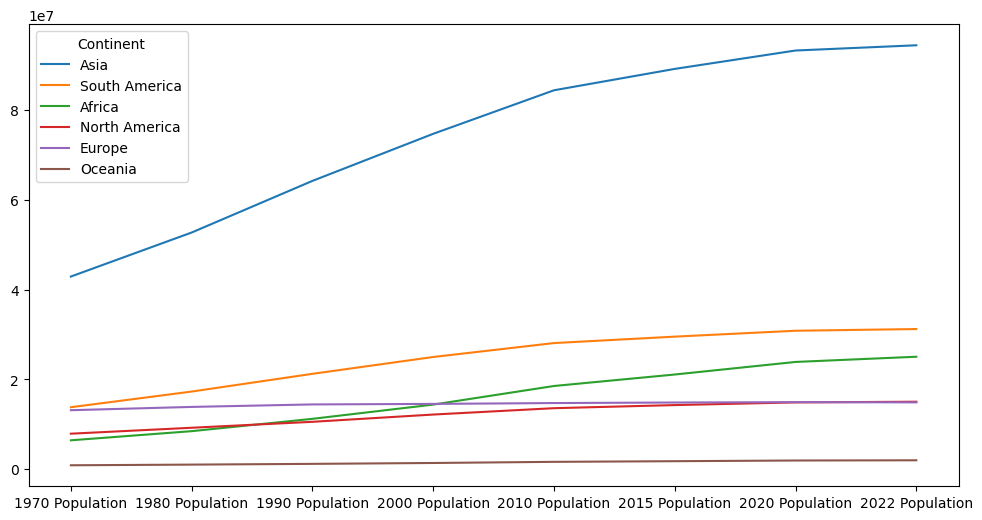

In [18]:
#this diagram shows how population has increased over the years by each continent
df3.plot(figsize=(12,6)) 

<Axes: >

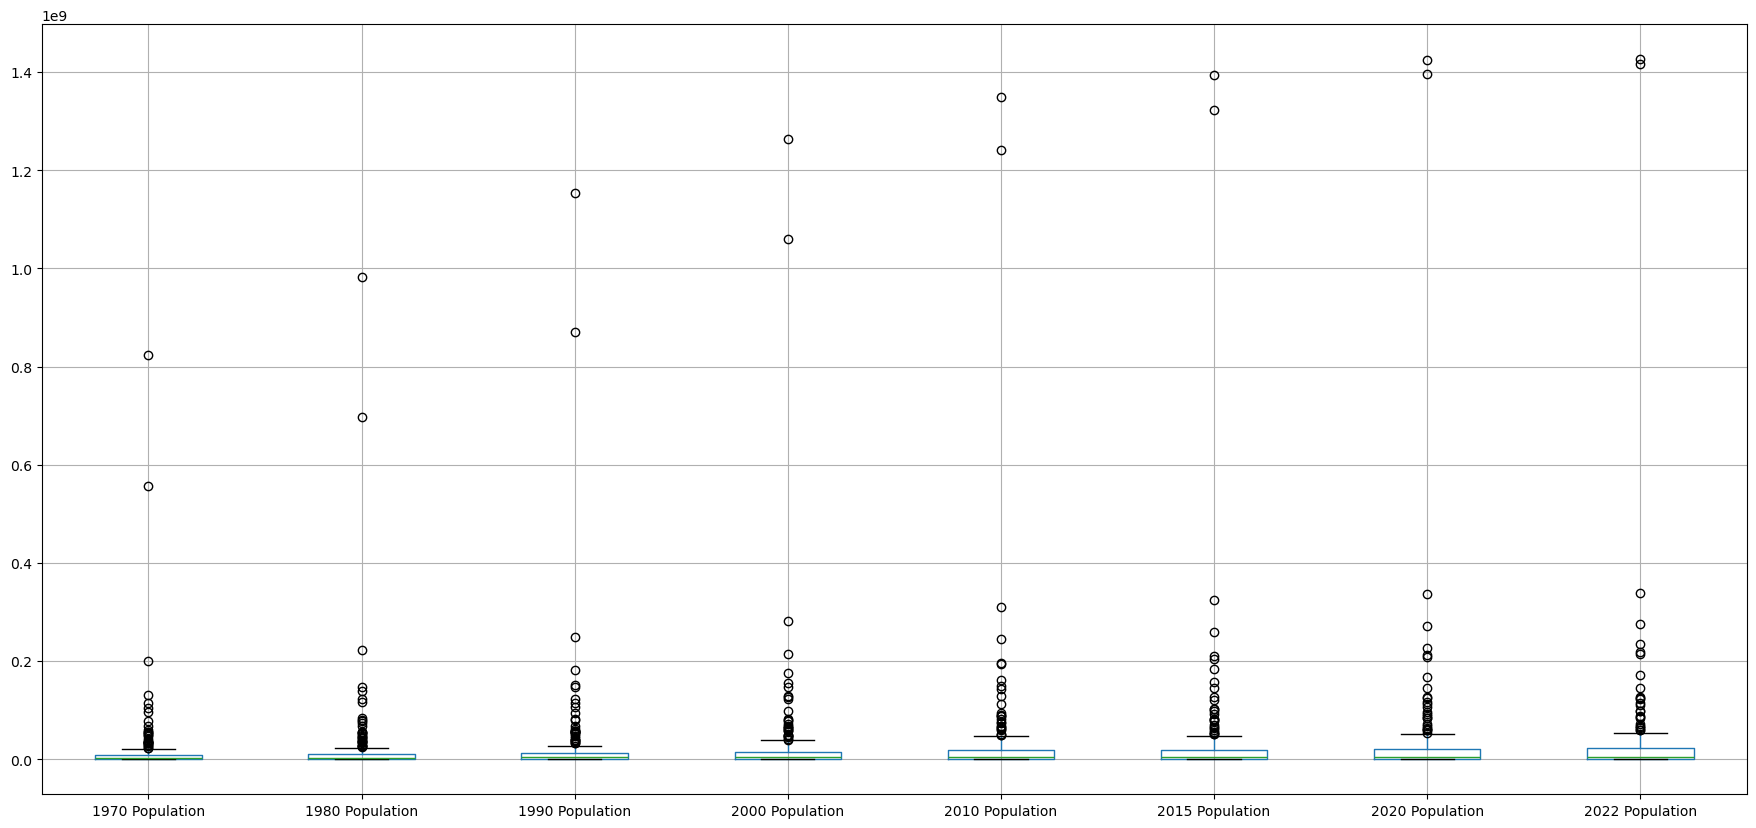

In [19]:
#Here is the boxplot of the years starting from 1970 to 2022
df[['1970 Population', '1980 Population', '1990 Population', '2000 Population', 
            '2010 Population', '2015 Population', '2020 Population', '2022 Population']].boxplot(figsize=(22,10))

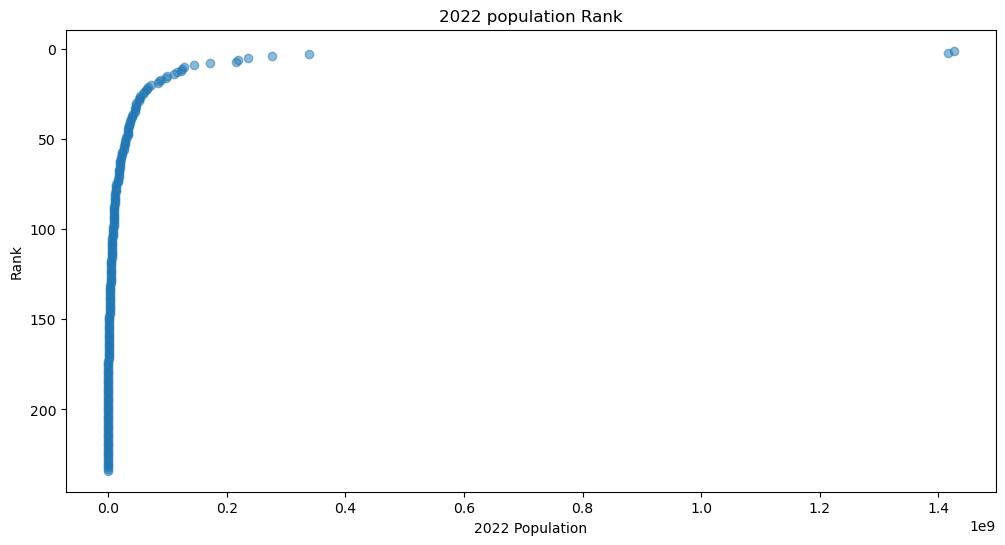

In [20]:
# Population VS rank 
plt.figure(figsize=(12, 6))
plt.scatter(df['2022 Population'], df['Rank'], alpha=0.5)
plt.title('2022 population Rank')
plt.xlabel('2022 Population')
plt.ylabel('Rank')
plt.gca().invert_yaxis()
plt.show()

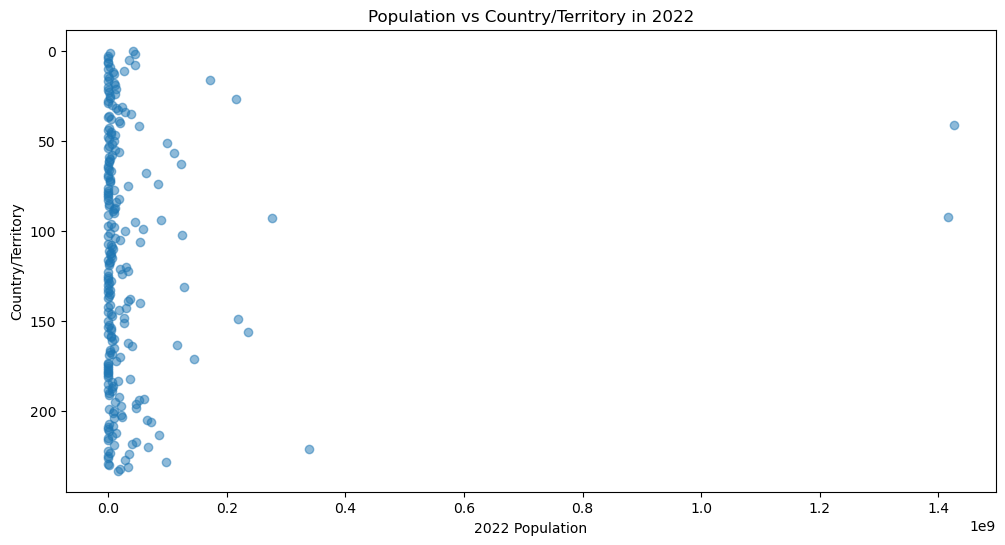

In [21]:
# I created a scatter plot to see Population vs Country in 2022, you can always change the year and see the results
plt.figure(figsize=(12, 6))
plt.scatter(df['2022 Population'], df['Country/Territory'], alpha=0.5)
plt.title('Population vs Country/Territory in 2022')
plt.xlabel('2022 Population')
plt.ylabel('Country/Territory')
plt.gca().invert_yaxis()
plt.show()


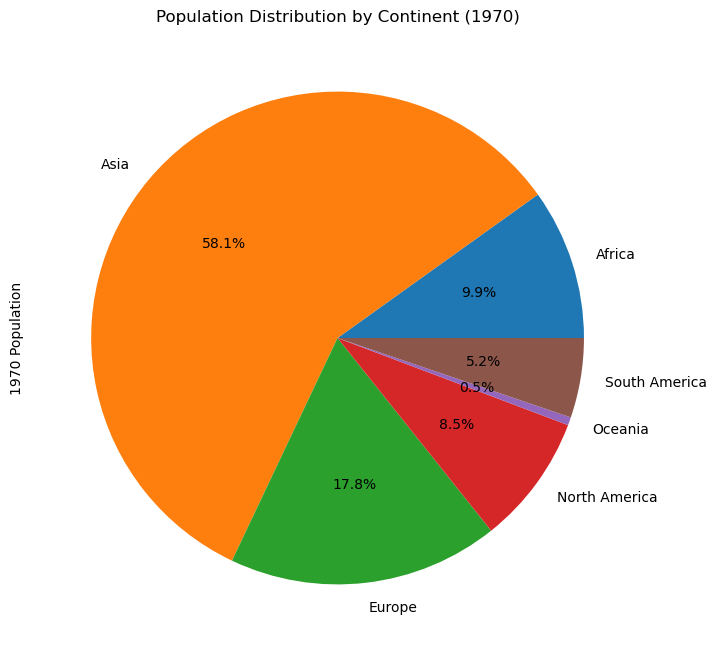

In [22]:
# Pie chart for population percentage by continent, and you can change and see any year pie chart
df1 = df.groupby('Continent')['1970 Population'].sum()
df1.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Population Distribution by Continent (1970)')
plt.show()


In [23]:
df.select_dtypes(include='float')

,Density (per km²),Growth Rate,World Population Percentage
0,63.0587,1.0257,0.52
1,98.8702,0.9957,0.04
2,18.8531,1.0164,0.56
3,222.4774,0.9831,0.00
4,170.5641,1.0100,0.00
...,...,...,...
229,81.4930,0.9953,0.00
230,2.1654,1.0184,0.01
231,63.8232,1.0217,0.42
232,26.5976,1.0280,0.25


In [24]:
#Feature Selection and Dimensionality Reduction
# Identify relevant features that contribute to customer segmentation.
# Apply dimensionality reduction techniques (e.g., PCA) to simplify the dataset while retaining important information.

Number of components: 3
Explained variance ratio: [0.81944918 0.10080543 0.07451764]


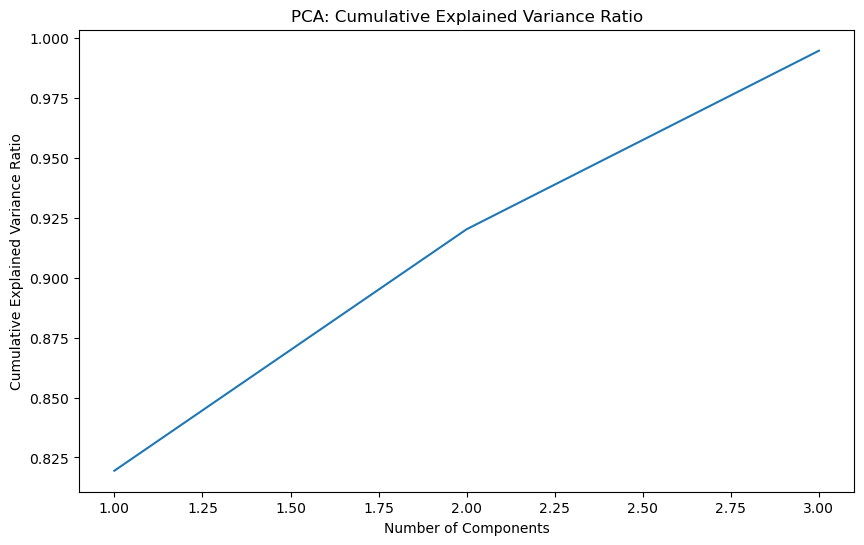

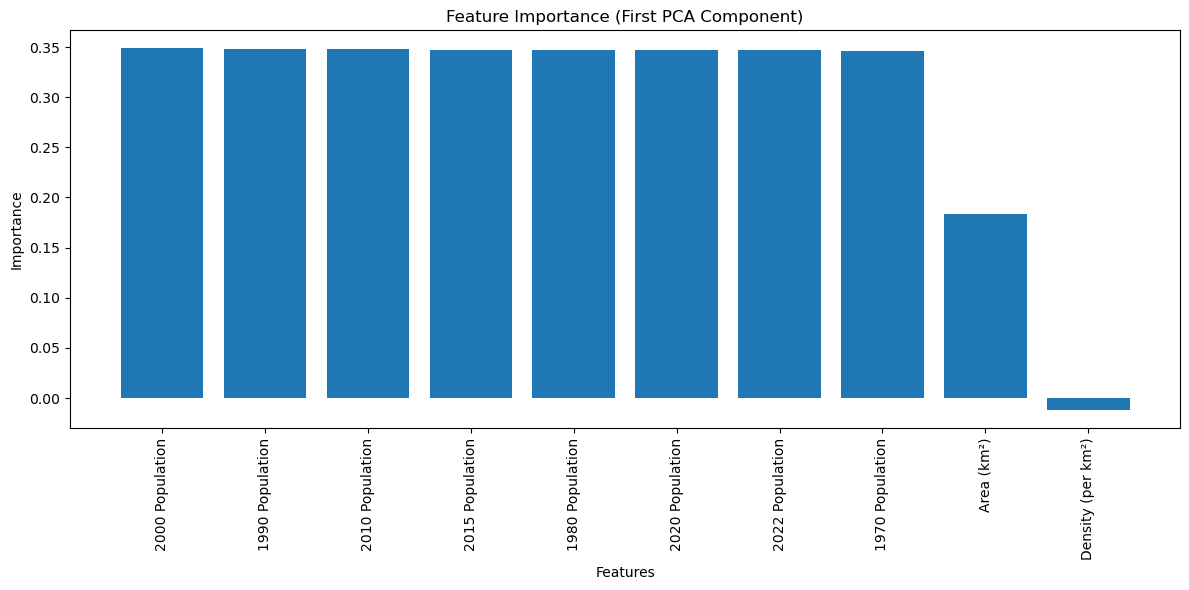

In [25]:
#I used population data from different years and the area of each country as input features.
df['high_growth_rate'] = (df['Growth Rate'] > 1.0).astype(int)

features = ['2022 Population', '2020 Population', '2015 Population', '2010 Population', 
            '2000 Population', '1990 Population', '1980 Population', '1970 Population', 
            'Density (per km²)', 'Area (km²)']

X = df[features]
y = df['high_growth_rate']

# Handle missing values
X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Display the number of components and explained variance ratio
print(f"Number of components: {X_pca.shape[1]}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Cumulative Explained Variance Ratio')
plt.show()

feature_importance = pd.DataFrame({
    'feature': features,
    'importance': pca.components_[0]
})
feature_importance = feature_importance.sort_values('importance', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (First PCA Component)')
plt.tight_layout()
plt.show()

In [26]:
# We will implement two basic classification algorithms: Logistic Regression and Decision Tree Classifier.

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred)}")
print(classification_report(y_test, lr_pred))

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("\nDecision Tree Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, dt_pred)}")
print(classification_report(y_test, dt_pred))


Logistic Regression Results:
Accuracy: 0.7872340425531915
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.79      1.00      0.88        37

    accuracy                           0.79        47
   macro avg       0.39      0.50      0.44        47
weighted avg       0.62      0.79      0.69        47


Decision Tree Classifier Results:
Accuracy: 0.7446808510638298
              precision    recall  f1-score   support

           0       0.38      0.30      0.33        10
           1       0.82      0.86      0.84        37

    accuracy                           0.74        47
   macro avg       0.60      0.58      0.59        47
weighted avg       0.73      0.74      0.73        47



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Classifier Results:
Accuracy: 0.7872340425531915
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        10
           1       0.81      0.95      0.88        37

    accuracy                           0.79        47
   macro avg       0.66      0.57      0.58        47
weighted avg       0.75      0.79      0.75        47



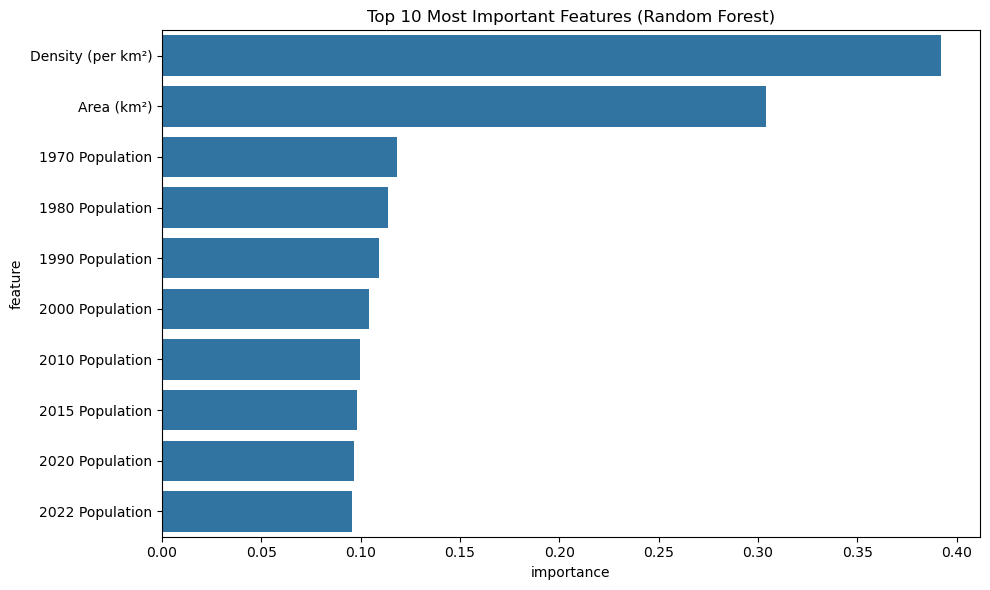

In [27]:
#I tried a more advanced method using a Random Forest Classifier to see how it turns out compared to normal methods.
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")
print(classification_report(y_test, rf_pred))

pca_importances = np.dot(pca.components_.T, rf_model.feature_importances_)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': pca_importances
}).sort_values('importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features (Random Forest)')
plt.tight_layout()
plt.show()


In [28]:
#I tried to use k-fold cross-validation. This showed me how good the models would be in practice on new data.
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X_pca, y, cv=5, scoring='accuracy')
    print(f"{name} - Mean Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

Logistic Regression - Mean Accuracy: 0.7949 (+/- 0.0190)
Decision Tree - Mean Accuracy: 0.7355 (+/- 0.1676)
Random Forest - Mean Accuracy: 0.7438 (+/- 0.1533)
